In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pickle

#Librería de geolocalizacion
from geopy.geocoders import Nominatim

import csv
import io
import json

#Librería de clima
import requests
from pprint import pprint

# Librerías para convertir en unix time
import datetime
from datetime import timezone
import dateutil.parser

In [2]:
!pip install geopy
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Combinar Dataset con los parámetros de entrada

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/ML2022/TESIS/Version2/dataframe_process_antes_eliminar_columns.csv',sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
dataset.columns

Index(['Unnamed: 0', 'CLIENTE', 'GUIA', 'FECHA_GUIA', 'ESTADO_GUIA',
       'FECHA_ENTREGA', 'SERVICIO', 'ORIGEN', 'DESTINO', 'ORIGEN_BASE',
       'DESTINO_BASE', 'REMITENTE', 'CONSIGNATARIO', 'PAQUETES',
       'GESTORA_SERVICIO', 'REPRESENTANTE', 'CONTADOR_VISITAS',
       'FORMA_CONF_ENTREGA', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'DIRECCION1', 'DIRECCION2', 'FECHA_EMBARQUE', 'FECHA_SALIDA_PROYECT',
       'FECHA_LLEGADA_PROYECT', 'FECHA_LLEGADA_REAL',
       'PROVEEDOR DE TRANSPORTE', 'VIA', 'N_MANIFIESTO', 'FECHA_MANIFIESTO',
       'ESTADO_MANIFIESTO', 'INCIDENCIA_MANIFIESTO',
       'FECHA MANIFIESTO_INFORMADO', 'FECHA MANIFIESTO_RECOGIDO',
       'FECHA MANIFIESTO_VERIFICADO', 'RESP_REPARTO', 'FECHA REPARTO',
       'NUMERO REPARTO', 'TIPO_INCIDENCIA_REPARTO', 'FECHA_INCIDENCIA_REPARTO',
       'FECHA_COMPROMISO', 'SUGERENCIAS', 'TIENE_AV', 'TIENE_JR',
       'TIENE_CALLE', 'count', 'Latitud', 'Longitud', 'TEMPERATURA', 'HUMEDAD',
       'CLIMA', 'AÑO', 'INDICE_DELIT

**Ahora eliminaremos las columnas que no guardan relación**

In [6]:
# Ahora eliminaremos las columnas que no guardan relación
dataset = dataset.drop(['GUIA'], axis=1)
dataset = dataset.drop(['AÑO'], axis=1)
dataset = dataset.drop(['DIRECCION1'], axis=1)
dataset = dataset.drop(['N_MANIFIESTO'], axis=1)
dataset = dataset.drop(['PROVINCIA'], axis=1)
dataset = dataset.drop(['DISTRITO'], axis=1)
dataset = dataset.drop(['NUMERO REPARTO'], axis=1)
dataset = dataset.drop(['FECHA MANIFIESTO_VERIFICADO'], axis=1)
dataset = dataset.drop(['ORIGEN_BASE'], axis=1)
dataset = dataset.drop(['REMITENTE'], axis=1)
dataset = dataset.drop(['FECHA_EMBARQUE'], axis=1)
dataset = dataset.drop(['FORMA_CONF_ENTREGA'], axis=1)
dataset = dataset.drop(['CONSIGNATARIO'], axis=1)
dataset = dataset.drop(['DESTINO_BASE'], axis=1)
dataset = dataset.drop(['REPRESENTANTE'], axis=1)
dataset = dataset.drop(['DIRECCION2'], axis=1)
dataset = dataset.drop(['FECHA_LLEGADA_PROYECT'], axis=1)
dataset = dataset.drop(['FECHA_LLEGADA_REAL'], axis=1)
dataset = dataset.drop(['FECHA MANIFIESTO_RECOGIDO'], axis=1)
dataset = dataset.drop(['FECHA MANIFIESTO_INFORMADO'], axis=1)
dataset = dataset.drop(['FECHA REPARTO'], axis=1)
dataset = dataset.drop(['DESTINO'], axis=1)
dataset = dataset.drop(['FECHA_COMPROMISO'], axis=1)
dataset = dataset.drop(['FECHA_MANIFIESTO'], axis=1)
dataset = dataset.drop(['RESP_REPARTO'], axis=1)
dataset = dataset.drop(['FECHA_INCIDENCIA_REPARTO'], axis=1)
dataset = dataset.drop(['FECHA_SALIDA_PROYECT'], axis=1)
dataset = dataset.drop(['FECHA_GUIA'], axis=1)
dataset = dataset.drop(['FECHA_ENTREGA'], axis=1)
dataset = dataset.drop(['ORIGEN'], axis=1)
dataset = dataset.drop(['GESTORA_SERVICIO'], axis=1)
dataset = dataset.drop(['PROVEEDOR DE TRANSPORTE'], axis=1)
dataset = dataset.drop(['CLIENTE'], axis=1)
dataset = dataset.drop(['count'], axis=1)
dataset = dataset.drop(['ESTADO_MANIFIESTO'], axis=1)
dataset = dataset.drop(['ESTADO_GUIA'], axis=1)

dataset = dataset.drop(['TIPO_INCIDENCIA_REPARTO'], axis=1)

In [7]:
dataset.columns

Index(['Unnamed: 0', 'SERVICIO', 'PAQUETES', 'CONTADOR_VISITAS',
       'DEPARTAMENTO', 'VIA', 'INCIDENCIA_MANIFIESTO', 'SUGERENCIAS',
       'TIENE_AV', 'TIENE_JR', 'TIENE_CALLE', 'Latitud', 'Longitud',
       'TEMPERATURA', 'HUMEDAD', 'CLIMA', 'INDICE_DELITOS', 'CANT_FENO_NAT',
       'CANT_PEA', 'CANT_ACC_TRANSITO'],
      dtype='object')

In [8]:
#Completamos los campos vaciós de las vias terrestres
moda = dataset['VIA'].mode()[0]
dataset['VIA'] = dataset['VIA'].fillna(moda)

In [9]:
moda = dataset['SERVICIO'].mode()[0]
dataset['SERVICIO'] = dataset['SERVICIO'].fillna(moda)

In [10]:
moda = dataset['DEPARTAMENTO'].mode()[0]
dataset['DEPARTAMENTO'] = dataset['DEPARTAMENTO'].fillna(moda)

In [11]:
dataset['TIENE_AV'] = np.where(dataset['TIENE_AV']==True, 1, dataset['TIENE_AV'])
dataset['TIENE_AV'] = np.where(dataset['TIENE_AV']==False, 0, dataset['TIENE_AV'])
dataset['TIENE_AV'] = np.where(dataset['TIENE_AV'].isna()==True, 0, dataset['TIENE_AV'])
dataset['TIENE_JR'] = np.where(dataset['TIENE_JR']==True, 1, dataset['TIENE_JR'])
dataset['TIENE_JR'] = np.where(dataset['TIENE_JR']==False, 0, dataset['TIENE_JR'])
dataset['TIENE_JR'] = np.where(dataset['TIENE_JR'].isna()==True, 0, dataset['TIENE_JR'])
dataset['TIENE_CALLE'] = np.where(dataset['TIENE_CALLE']==True, 1, dataset['TIENE_CALLE'])
dataset['TIENE_CALLE'] = np.where(dataset['TIENE_CALLE']==False, 0, dataset['TIENE_CALLE'])
dataset['TIENE_CALLE'] = np.where(dataset['TIENE_CALLE'].isna()==True, 0, dataset['TIENE_CALLE'])
dataset['INCIDENCIA_MANIFIESTO'] = np.where(dataset['INCIDENCIA_MANIFIESTO'].isnull()==True, 'OK', dataset['INCIDENCIA_MANIFIESTO'])

In [12]:
dataset['NO_TIENE_REF'] = 0
dataset['NO_TIENE_REF'] = np.where((dataset['TIENE_AV']==0) & (dataset['TIENE_JR']==0) & (dataset['TIENE_CALLE']==0), 1, dataset['NO_TIENE_REF'])

In [13]:
dataset = dataset.drop(dataset[dataset.DEPARTAMENTO == "ANDAHUAYLAS"].index)

In [14]:
dataset.count()

Unnamed: 0               36017
SERVICIO                 36017
PAQUETES                 36017
CONTADOR_VISITAS         36017
DEPARTAMENTO             36017
VIA                      36017
INCIDENCIA_MANIFIESTO    36017
SUGERENCIAS              36017
TIENE_AV                 36017
TIENE_JR                 36017
TIENE_CALLE              36017
Latitud                  36017
Longitud                 36017
TEMPERATURA              36017
HUMEDAD                  36017
CLIMA                    36017
INDICE_DELITOS           36017
CANT_FENO_NAT            36017
CANT_PEA                 36017
CANT_ACC_TRANSITO        36017
NO_TIENE_REF             36017
dtype: int64

# Convertir datos categóricos a numéricos

In [15]:
dataset["TIENE_AV"] = dataset["TIENE_AV"].astype('int')
dataset["TIENE_JR"] =dataset["TIENE_JR"].astype('int')
dataset["TIENE_CALLE"] =dataset["TIENE_CALLE"].astype('int')
dataset["NO_TIENE_REF"] = dataset["NO_TIENE_REF"].astype('int')

In [16]:
prueba_dataset = dataset.copy()

#Dictionario Servicios
listaServicios = dataset["SERVICIO"].unique().tolist()
dictionaryServicios = {servicio:listaServicios.index(servicio) for servicio in listaServicios}

#Dictionario Departamentos
listaDepartamentos = dataset["DEPARTAMENTO"].unique().tolist()
dictionaryDepartamentos = {departamento:listaDepartamentos.index(departamento) for departamento in listaDepartamentos}

#Dictionario Climas
listaClimas = dataset["CLIMA"].unique().tolist()
dictionaryClimas = {clima:listaClimas.index(clima) for clima in listaClimas}

#Dictionario Tipo incidencia
#listaTipoIncidencia = dataset["TIPO_INCIDENCIA_REPARTO"].unique().tolist()
#dictionaryTipoIncidencia = {tipoIncidenciaRep:listaTipoIncidencia.index(tipoIncidenciaRep) for tipoIncidenciaRep in listaTipoIncidencia}

#Dictionario Incidencia Manifiesto
listaIncidenciaMan = dataset["INCIDENCIA_MANIFIESTO"].unique().tolist()
dictionaryIncidenciaMan = {incidenciaMan:listaIncidenciaMan.index(incidenciaMan) for incidenciaMan in listaIncidenciaMan}

#Dictionario sugerencia
listaSugerencias = dataset["SUGERENCIAS"].unique().tolist()
dictionarySugerencias = {sugerencia:listaSugerencias.index(sugerencia) for sugerencia in listaSugerencias}

#Dictionario via
listaVias = dataset["VIA"].unique().tolist()
dictionaryVias = {via:listaVias.index(via) for via in listaVias}


In [17]:
preprocessed_dataset = dataset.copy()
columnas_numericas = list()
columnas_categoricas = list()

for column in preprocessed_dataset:
  #Determinamos si la variable es numérica o no
  if pd.api.types.is_numeric_dtype(preprocessed_dataset[column]):
    columnas_numericas.append(column)
  else:
    columnas_categoricas.append(column)


In [18]:
columnas_categoricas

['SERVICIO',
 'DEPARTAMENTO',
 'VIA',
 'INCIDENCIA_MANIFIESTO',
 'SUGERENCIAS',
 'CLIMA']

In [19]:
for i in dataset.index:
  departamento = str(dataset.loc[i,"DEPARTAMENTO"])
  servicio = str(dataset.loc[i,"SERVICIO"])
  via = str(dataset.loc[i,"VIA"])
  incidenciaMan = str(dataset.loc[i,"INCIDENCIA_MANIFIESTO"])
  #tipoIncidencia = str(dataset.loc[i,"TIPO_INCIDENCIA_REPARTO"])
  sugerencia = str(dataset.loc[i,"SUGERENCIAS"])
  clima = str(dataset.loc[i,"CLIMA"])

  val_departamento = dictionaryDepartamentos[departamento]
  val_servicio = dictionaryServicios[servicio]
  val_via = dictionaryVias[via]
  val_incidenciaMan = dictionaryIncidenciaMan[incidenciaMan]
  #val_tipoIncidencia = dictionaryTipoIncidencia[tipoIncidencia]
  val_sugerencia = dictionarySugerencias[sugerencia]
  val_clima = dictionaryClimas[clima]

  dataset.loc[i,"SERVICIO"] = val_servicio
  dataset.loc[i,"DEPARTAMENTO"] = val_departamento
  dataset.loc[i,"VIA"] = val_via
  dataset.loc[i,"INCIDENCIA_MANIFIESTO"] = val_incidenciaMan
  #dataset.loc[i,"TIPO_INCIDENCIA_REPARTO"] = val_tipoIncidencia
  dataset.loc[i,"SUGERENCIAS"] = val_sugerencia
  dataset.loc[i,"CLIMA"] = val_clima

In [20]:
dataset["SERVICIO"] = dataset["SERVICIO"].astype('int')
dataset["DEPARTAMENTO"] =dataset["DEPARTAMENTO"].astype('int')
dataset["VIA"] =dataset["VIA"].astype('int')
dataset["INCIDENCIA_MANIFIESTO"] = dataset["INCIDENCIA_MANIFIESTO"].astype('int')
#dataset["TIPO_INCIDENCIA_REPARTO"] =dataset["TIPO_INCIDENCIA_REPARTO"].astype('int')
dataset["SUGERENCIAS"] =dataset["SUGERENCIAS"].astype('int')
dataset["CLIMA"] = dataset["CLIMA"].astype('int')

In [21]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)

# Entrenar y predecir modelos

In [22]:
from sklearn.model_selection import train_test_split
semilla_random_state = 20

X = dataset.drop(columns=['SUGERENCIAS']).copy()
y = dataset['SUGERENCIAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, # Vectores X e y
                                                    test_size = 0.2, # Fracción para prueba (en este caso, 20%)
                                                    random_state = semilla_random_state) # Semilla aleatoria, solo con fines de reproducibilidad. Hace que siempre que se ejecute el código,
                                                                                           # el resultado sea el mismo. Normalmente no se usaria.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(50,500,100)]
print(n_estimators)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
print(max_depth)
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# best 
list_criterion = ['gini','entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': list_criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

[50, 150, 250, 350, 450]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
{'n_estimators': [50, 150, 250, 350, 450], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 150, 250, 350,
                                                         450]},
                   random_state=42, verbose=2)

In [ ]:
def evaluate(model, test_features, test_labels):
  y_pred = model.predict(test_features)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print(accuracy)
  print(confusion_matrix(y_test,y_pred))
    
best_random = rf_random.best_estimator_
evaluate(best_random,X_test,y_test)

0.892282065519156
[[  76    4    9   13    0    0    0  157]
 [   3   75    8    0    0    0    0  110]
 [   1    2  151    0    0    0    0  110]
 [  16    0    3   34    0    0    0  232]
 [   2    1    0    2    0    0    0   16]
 [   0    0    0    0    0    0    0    4]
 [   0    0    0    0    0    0    0   14]
 [  13    6   48    2    0    0    0 6092]]


**Mejor combinación de hiperparámetros**

In [ ]:
rf_random.best_params_

{'n_estimators': 250,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100,
 'criterion': 'entropy',
 'bootstrap': False}

In [24]:
model3 = RandomForestClassifier(n_estimators= 250, min_samples_split= 10, min_samples_leaf= 2,max_features='auto',max_depth=100,criterion= 'entropy',bootstrap= False)
model3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=100,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=250)

In [27]:
model3.score(X_train,y_train)

0.9089994099885469

In [25]:
from sklearn.metrics import accuracy_score
# make predictions for test data
y_pred = model3.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.16%


In [26]:
from sklearn.metrics import classification_report
#target_names = [0,1,2,3,4,5,6,7]
print(classification_report(y_test, predictions, labels=[0,1,2,3,4,5,6,7]))

              precision    recall  f1-score   support

           0       0.67      0.29      0.40       259
           1       0.85      0.38      0.52       196
           2       0.68      0.57      0.62       264
           3       0.65      0.12      0.20       285
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        14
           7       0.90      0.99      0.94      6161

    accuracy                           0.89      7204
   macro avg       0.47      0.29      0.34      7204
weighted avg       0.87      0.89      0.87      7204



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = RandomForestClassifier(max_depth=4,n_estimators=50, verbose=1,criterion="gini")
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


RandomForestClassifier(max_depth=4, n_estimators=50, verbose=1)

In [ ]:
model2 = RandomForestClassifier(max_depth=4,n_estimators=50, verbose=1,criterion="entropy")
model2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=50,
                       verbose=1)

In [ ]:
# evaluate predictions
model.score(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


0.8681150869399229

In [ ]:
# evaluate predictions
model2.score(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


0.8647485510012841

In [ ]:
importances = pd.DataFrame({"columns":X_train.columns, "importances":model.feature_importances_}).sort_values("importances", ascending=False)

In [ ]:
importances2 = pd.DataFrame({"columns":X_train.columns, "importances":model2.feature_importances_}).sort_values("importances", ascending=False)

In [ ]:
importances.style.bar()

,columns,importances
2,CONTADOR_VISITAS,0.282574
17,CANT_ACC_TRANSITO,0.157714
16,CANT_ADULTOMAYOR,0.113864
3,DEPARTAMENTO,0.087073
9,Latitud,0.073427
10,Longitud,0.063959
11,TEMPERATURA,0.052368
14,INDICE_DELITOS,0.045066
12,HUMEDAD,0.029747
15,CANT_FENO_NAT,0.028553


In [ ]:
importances2.style.bar()

,columns,importances
17,CANT_ACC_TRANSITO,0.191738
2,CONTADOR_VISITAS,0.147841
16,CANT_ADULTOMAYOR,0.124184
9,Latitud,0.121161
10,Longitud,0.104682
3,DEPARTAMENTO,0.085408
11,TEMPERATURA,0.059581
14,INDICE_DELITOS,0.049366
15,CANT_FENO_NAT,0.039303
12,HUMEDAD,0.030621


In [ ]:
from sklearn.metrics import accuracy_score
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.98%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [ ]:
from sklearn.metrics import classification_report
#target_names = [0,1,2,3,4,5,6,7]
print(classification_report(y_test, predictions, labels=[0,1,2,3,4,5,6,7]))

              precision    recall  f1-score   support

           0       0.40      0.04      0.07       259
           1       0.00      0.00      0.00       196
           2       0.00      0.00      0.00       264
           3       0.59      0.08      0.15       285
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        14
           7       0.86      1.00      0.93      6161

    accuracy                           0.86      7204
   macro avg       0.23      0.14      0.14      7204
weighted avg       0.78      0.86      0.80      7204



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# make predictions for test data
y_pred = model2.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.73%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [ ]:
print(classification_report(y_test, predictions, labels=[0,1,2,3,4,5,6,7]))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      0.01      0.02       259
           1       0.00      0.00      0.00       196
           2       0.00      0.00      0.00       264
           3       0.72      0.05      0.09       285
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        14
           7       0.86      1.00      0.92      6161

    accuracy                           0.86      7204
   macro avg       0.26      0.13      0.13      7204
weighted avg       0.78      0.86      0.79      7204



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Matriz de confusión

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix

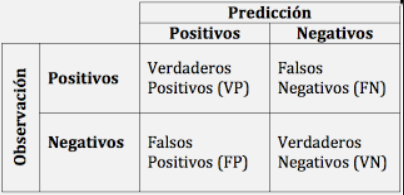

In [ ]:
multilabel_confusion_matrix(y_test, predictions)

array([[[6943,    2],
        [ 257,    2]],

       [[7008,    0],
        [ 196,    0]],

       [[6940,    0],
        [ 264,    0]],

       [[6914,    5],
        [ 272,   13]],

       [[7183,    0],
        [  21,    0]],

       [[7200,    0],
        [   4,    0]],

       [[7190,    0],
        [  14,    0]],

       [[  22, 1021],
        [   0, 6161]]])

# Métrica

In [ ]:
metricF1_score = f1_score(y_test, predictions, average=None)

In [ ]:
metricF1_score

array([0.01520913, 0.        , 0.        , 0.08580858, 0.        ,
       0.        , 0.        , 0.92348048])

In [ ]:
f1_score(y_test, predictions, average='macro')

0.12806227287347455